In [1]:
import tensorflow as tf
#Vers. 0.12.1
#print(tf.__version__)
import sys
#Should be above 3.5
#print (sys.versio£n)     

import cv2
import numpy as np
import os
import glob
import pickle

import matplotlib.image as mpimg
from skimage import color

import random

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

from Helpers import get_files, load_image, separate_imgs, get_next_batch_from_disk2, get_next_batch_from_disk_RGB

# Colorize

In [2]:
def colorize_TF(gray_images):
    with tf.Session() as sess:
        model_path = "./test1image/model.ckpt"
        save_dir = 'test1image'

        new_saver = tf.train.import_meta_graph(save_dir + "/model.ckpt.meta")
        new_saver.restore(sess, save_dir + '/model.ckpt')

        # tf.get_collection() returns a list. In this example we only want the
        # first one.
        colored_images = tf.get_collection('color_image')[0]

        images = np.array(gray_images)
        
        return sess.run(colored_images, feed_dict={"x:0": images})

In [3]:
images_list = get_files("..\Data\Images\\*", '*.jpg')
batch_size = 1

gray, img = get_next_batch_from_disk_RGB(images_list, batch_size)

colored = colorize_TF(gray)

#a,b = np.split(colored[0], 2, axis=2)
#coloried
    
#plt.imshow(colored[1])

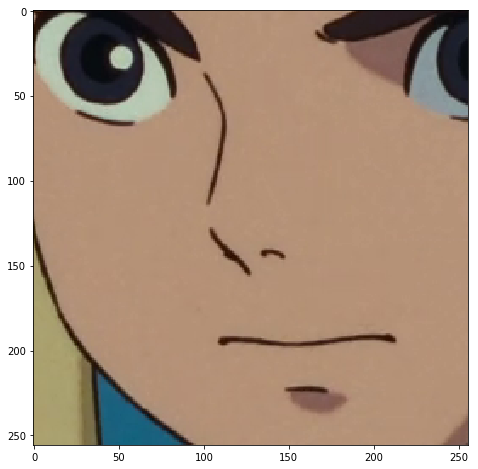

In [4]:

r = img[0][..., 0]
g = img[0][..., 1]
b = img[0][..., 2]

plt.imshow(np.dstack((r,g,b)))


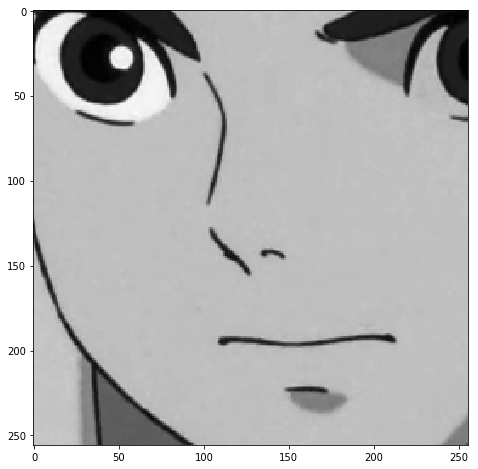

In [5]:
plt.imshow(gray[0][..., 0], cmap="gray")

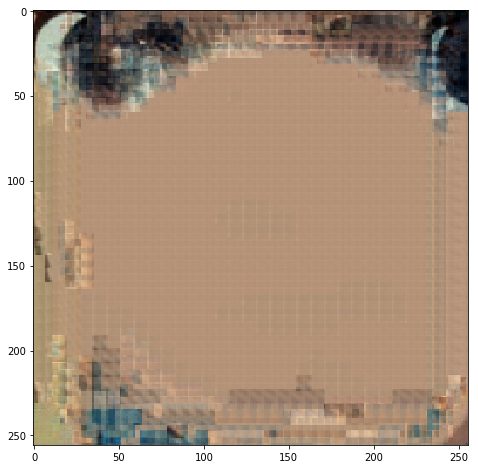

In [6]:
r = colored[0][..., 0]
g = colored[0][..., 1] 
b = colored[0][..., 2]

plt.imshow(np.dstack((r,g,b)))